In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from tensorflow import keras
import tensorflow.keras.layers as k
from tqdm import tqdm
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

## Data

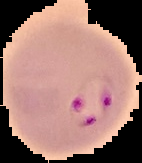

In [2]:
load_img("C:/Users/KIIT/Desktop/Malaria/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png")

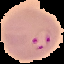

In [3]:
load_img("C:/Users/KIIT/Desktop/Malaria/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png", target_size=(64,64))

In [4]:
os.environ['KERAS_BACKEND']='tensorflow'
np.random.seed(312)

In [5]:
image_dir="C:/Users/KIIT/Desktop/Malaria/cell_images/"
size=64
dataset=[]
label=[]

In [6]:
parasitized_img=os.listdir(image_dir+"Parasitized/")
parasitized_img=parasitized_img[:3000]
for i,img_name in enumerate(tqdm(parasitized_img)):
    if (img_name.split(".")[1]=="png"):
        image = cv2.imread(image_dir+"Parasitized/"+img_name)
        image = Image.fromarray(image,'RGB')
        image = image.resize((size,size))
        
        dataset.append(np.array(image))
        label.append(0)

        
        
uninfected_img=os.listdir(image_dir+"Uninfected/")
uninfected_img=uninfected_img[:3000]
for i,img_name in enumerate(tqdm(uninfected_img)):
    if (img_name.split(".")[1]=="png"):
        image = cv2.imread(image_dir+"Uninfected/"+img_name)
        image = Image.fromarray(image,'RGB')
        image = image.resize((size,size))
        
        dataset.append(np.array(image))
        label.append(1)

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:06<00:00, 475.65it/s]


In [7]:
x_train,x_test,y_train,y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size=0.2,random_state=0)

# CNN Model architecture

In [8]:
INPUT_SHAPE=(size,size,3)

inp= k.Input(shape=INPUT_SHAPE)

conv1= k.Conv2D(32,kernel_size=(3,3), activation="relu", padding="same")(inp)
pool1=k.MaxPool2D(pool_size=(2,2))(conv1)
norm1=k.BatchNormalization(axis=-1)(pool1)
drop1=k.Dropout(rate=0.2)(norm1)

conv2=k.Conv2D(32,kernel_size=(3,3), activation="relu", padding="same")(drop1)
pool2=k.MaxPool2D(pool_size=(2,2))(conv2)
norm2=k.BatchNormalization(axis=-1)(pool2)
drop2=k.Dropout(rate=0.2)(norm2)

conv3 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(drop2)
pool3 = k.MaxPool2D(pool_size = (2,2))(conv3)
norm3 = k.BatchNormalization(axis = -1)(pool3)
drop3 = k.Dropout(rate = 0.2)(norm3)

flat=k.Flatten()(drop3)
hiden1=k.Dense(512, activation="relu")(flat)
norm3=k.BatchNormalization(axis=-1)(hiden1)
drop3=k.Dropout(rate=0.2)(norm3)

hiden2=k.Dense(256, activation="relu")(drop3)
norm4=k.BatchNormalization(axis=-1)(hiden2)
drop4=k.Dropout(rate=0.2)(norm4)

out=k.Dense(2,activation="sigmoid")(drop4)


In [9]:
model=keras.Model(inputs=inp, outputs=out)
model.compile(optimizer="adam", 
              loss='categorical_crossentropy',
              metrics=["accuracy"])

print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 1,203,778 (4.59 MB)

 Trainable params: 1,202,050 (4.59 MB)

 Non-trainable params: 1,728 (6.75 KB)

None


In [10]:
history=model.fit(np.array(x_train), y_train,
                 batch_size=64, verbose=1,epochs=10, validation_split=0.1,shuffle=False)

Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.5937 - loss: 0.9475 - val_accuracy: 0.5750 - val_loss: 1.1463
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - accuracy: 0.6905 - loss: 0.6657 - val_accuracy: 0.5208 - val_loss: 1.6966
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.8215 - loss: 0.4067 - val_accuracy: 0.4979 - val_loss: 6.8912
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - accuracy: 0.8847 - loss: 0.2870 - val_accuracy: 0.7812 - val_loss: 0.5973
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 0.9069 - loss: 0.2419 - val_accuracy: 0.5667 - val_loss: 3.7187
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.9327 - loss: 0.1762 - val_accuracy: 0.7167 - val_loss: 1.8972
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.9446 - loss: 0.1525 - val_accuracy: 0.7167 - val_loss: 1.9949
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.9481 - loss: 0.1519 - val_accurac

In [11]:
print("Test accuracy: {:.2f}%".format(model.evaluate(np.array(x_test),np.array(y_test))[1]*100))

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9025 - loss: 0.6032
Test accuracy: 88.42%


In [12]:
# f, (ax1,ax2)=plt.subplots(1,2, figsize=(12,4))
# t=f.suptitle("CN Performance", fontsize=12)
# f.subplots_adjust(top=0.85, wspace=0.3)

# max_epoch=len(history.history["accuracy"])+1
# epoch_list=list(range(1,max_epoch))
# ax1.plot(epoch_list,history.history["accuracy"], label="Train Accuracy")
# ax1.plot(epoch_list,history.history["val_accuracy"], label="Validation Accuracy")
# ax1.set_xticks(np.arange(1,max_epoch,5))
# ax1.set_ylabel("Accuracy Value")
# ax1.set_xlabel("Epoch")
# ax1.set_title("Accuracy")
# l1=ax1.legend(loc="best")

# ax2.plot(epoch_list,history.history["loss"], label="Train Loss")
# ax2.plot(epoch_list,history.history["val_loss"], label="Validation Loss")
# ax2.set_xticks(np.arange(1,max_epoch,5))
# ax2.set_ylabel("Loss Value")
# ax2.set_xlabel("Epoch")
# ax2.set_title("Loss")
# l2=ax2.legend(loc="best")
model.save(r"C:\Users\KIIT\Desktop\Malaria\malaria_cell.h5")
